In [1]:
from __future__ import annotations

import json
import os
from typing import Literal

import numpy as np
import matplotlib.pyplot as plt


os.makedirs("../figs/", exist_ok=True)
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 18
plt.rcParams['mathtext.fontset'] = 'stix'  # The setting of math font

In [2]:
def extract(ans: np.ndarray, cmp: np.ndarray) -> tuple[np.ndarray, np.ndarray]:
    a1 = {v: i for i, v in enumerate(ans)}
    a2 = {v: i for i, v in enumerate(cmp)}
    XY = np.array([[a1[i], a2[i]] for i in range(ans.size)])
    return XY[:, 0], XY[:, 1]


def plot_order_match(mode: Literal["cheap", "expensive", "bit-expensive"], fmt: Literal["png", "pdf"] = "pdf"):
    print(f"Plot {mode=} with {fmt=}")
    results = json.load(open(f"../validation-results/order-match-{mode}-results.json"))
    fig, axes = plt.subplots(
        ncols=2,
        nrows=2,
        figsize=(10, 7),
        sharex=True,
        sharey=True,
        gridspec_kw=dict(hspace=0.17, wspace=0.03)
    )
    dist_dict = {
        "random": "Uniform",
        "exponential": "Exponential",
        "pareto": "Pareto",
        "lognormal": "Log Normal",
    }

    for i, (dist, result) in enumerate(results.items()):
        r, c = i // 2, i % 2
        ax = axes[r][c]
        ax.set_xlim(0, 99.9)
        ax.set_ylim(0, 99.9)
        answer, sim, rnd = map(np.asarray, [result["answer"], result["simulated"], result["random"]])
        lines = [
            ax.scatter(*extract(answer, sim), color="red", s=10),
            ax.scatter(*extract(answer, rnd), color="blue", s=10),
        ]
        ax.set_title(dist_dict[dist])
        ax.grid()

    axes[-1][0].legend(
        handles=lines,
        loc='upper center',
        labels=["With Our Wrapper", "Without Our Wrapper"],
        fontsize=18,
        bbox_to_anchor=(1.02, -0.10),  # ここは調整が必要です
        fancybox=False,
        ncol=len(lines)
    )

    plt.savefig(f"../figs/order-match-{mode}.{fmt}", bbox_inches="tight")

Plot mode='cheap' with fmt='pdf'
Plot mode='expensive' with fmt='pdf'
Plot mode='bit-expensive' with fmt='pdf'
Plot mode='cheap' with fmt='png'
Plot mode='expensive' with fmt='png'
Plot mode='bit-expensive' with fmt='png'


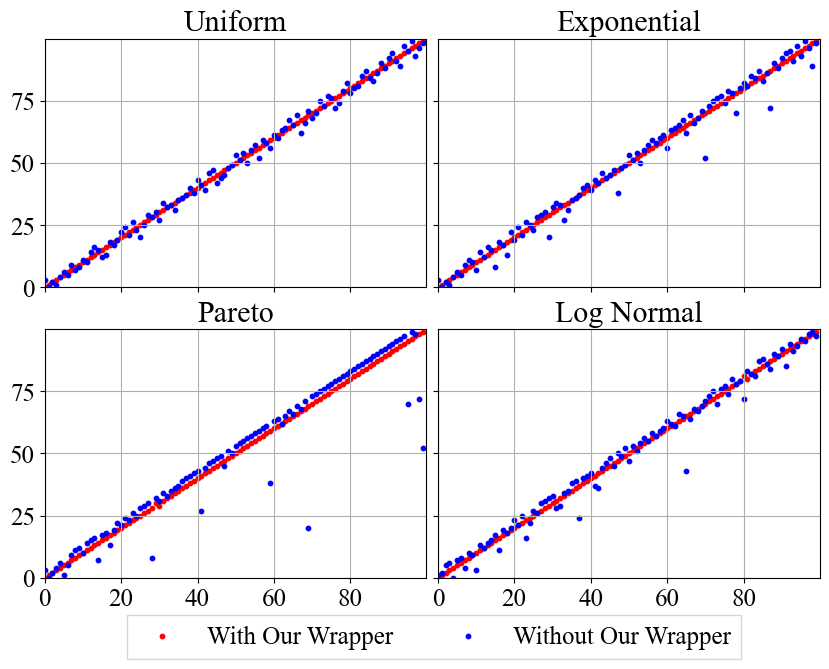

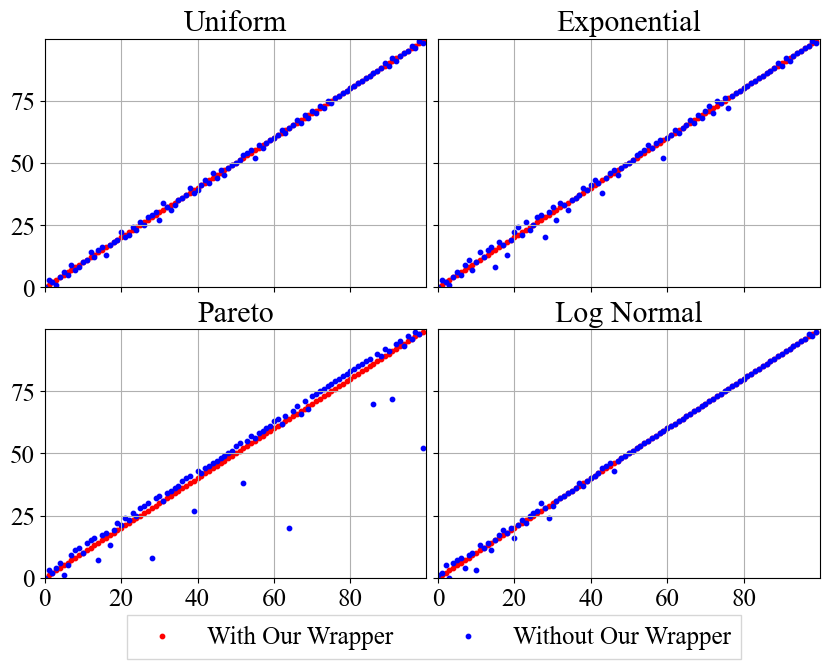

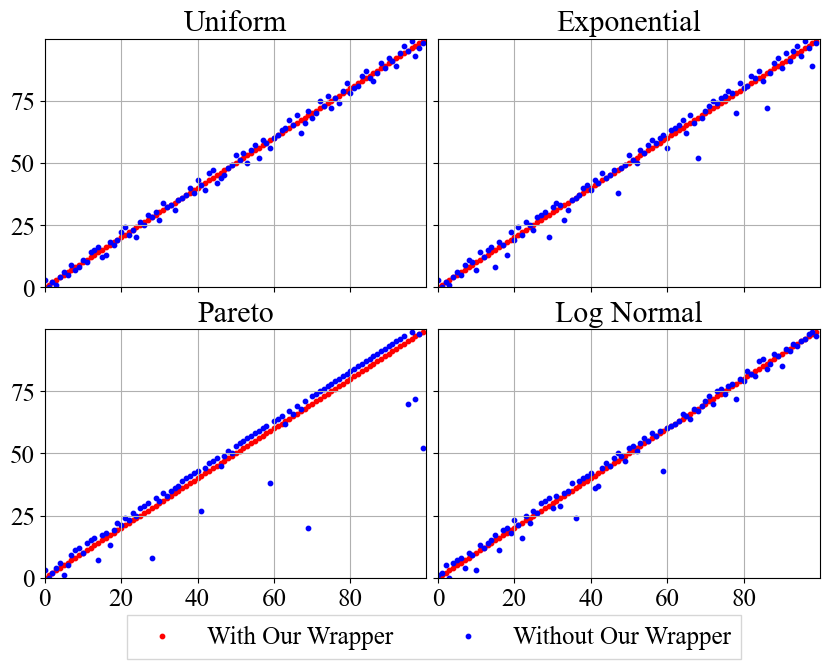

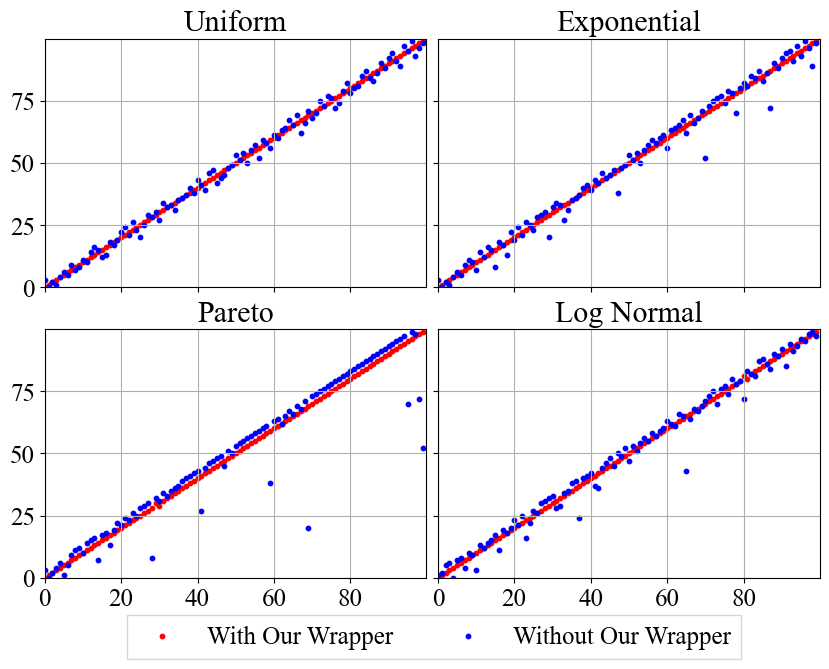

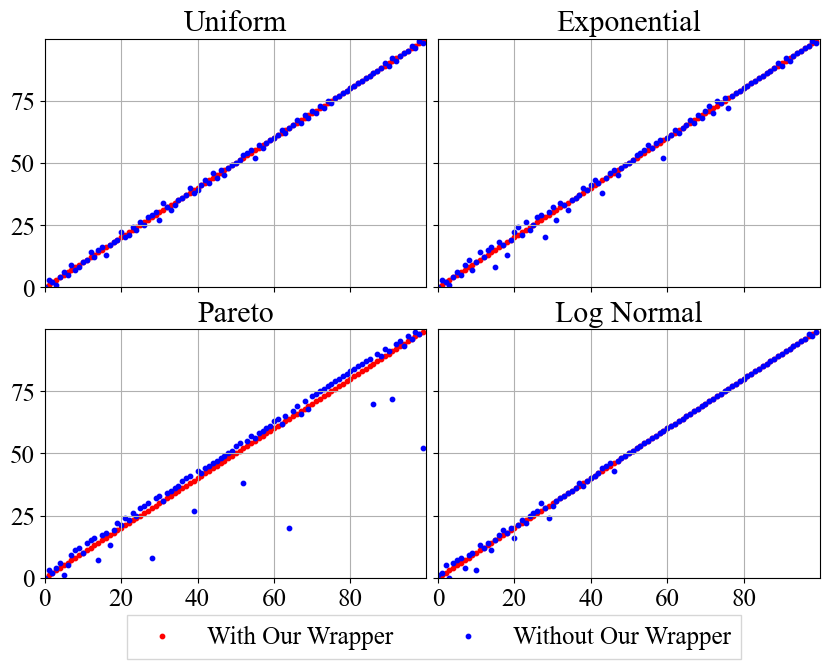

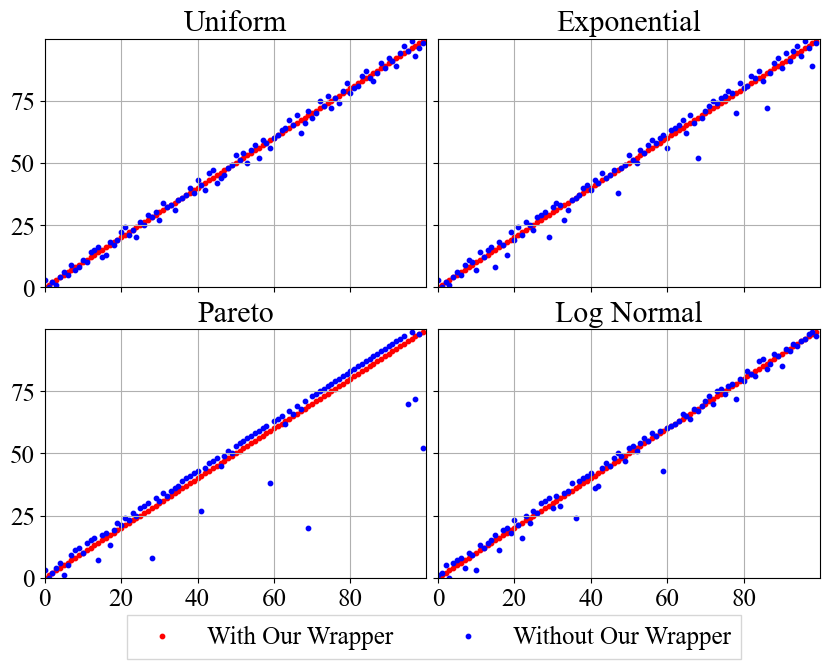

In [3]:
for fmt in ["pdf", "png"]:
    plot_order_match(mode="cheap", fmt=fmt)
    plot_order_match(mode="expensive", fmt=fmt)
    plot_order_match(mode="bit-expensive", fmt=fmt)